## Comparing the clean and incremental build time of a system on its different configurations

In [9]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,24.45,4898824,0.30,0.20,0.06
1,00002,44.88,3669216,41.42,32.87,1.13
2,00003,34.11,644608,30.38,19.09,0.11
3,00004,45.82,4356640,42.23,33.42,0.12
4,00005,26.85,1067672,0.35,0.24,0.06
5,00006,25.16,4516392,1.33,1.26,1.21
6,00007,24.49,4292872,20.91,13.10,0.12
7,00008,37.32,4783008,0.36,0.24,0.06
8,00009,32.02,784552,0.08,0.07,0.07
9,00010,25.07,4521984,21.04,13.23,0.11


In [10]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
7,00008,37.32,0.06,99.85
10,00011,60.46,0.11,99.81
8,00009,32.02,0.07,99.80
17,00018,24.76,0.06,99.77
0,00001,24.45,0.06,99.77
4,00005,26.85,0.06,99.76
3,00004,45.82,0.12,99.75
12,00013,42.29,0.13,99.70
2,00003,34.11,0.11,99.68
16,00017,31.68,0.12,99.62


In [11]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
7,00008,37.32,0.06,99.85
10,00011,60.46,0.11,99.81
8,00009,32.02,0.07,99.80
17,00018,24.76,0.06,99.77
0,00001,24.45,0.06,99.77
15,00016,46.28,1.07,97.69
1,00002,44.88,1.13,97.49
11,00012,28.23,1.07,96.19
18,00019,22.47,1.08,95.21
5,00006,25.16,1.21,95.20


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

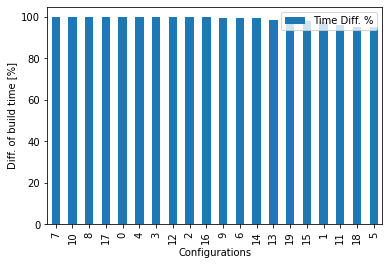

In [12]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df4[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot